<a href="https://colab.research.google.com/github/rutvi615/data_narrative/blob/main/22110227_DN3_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

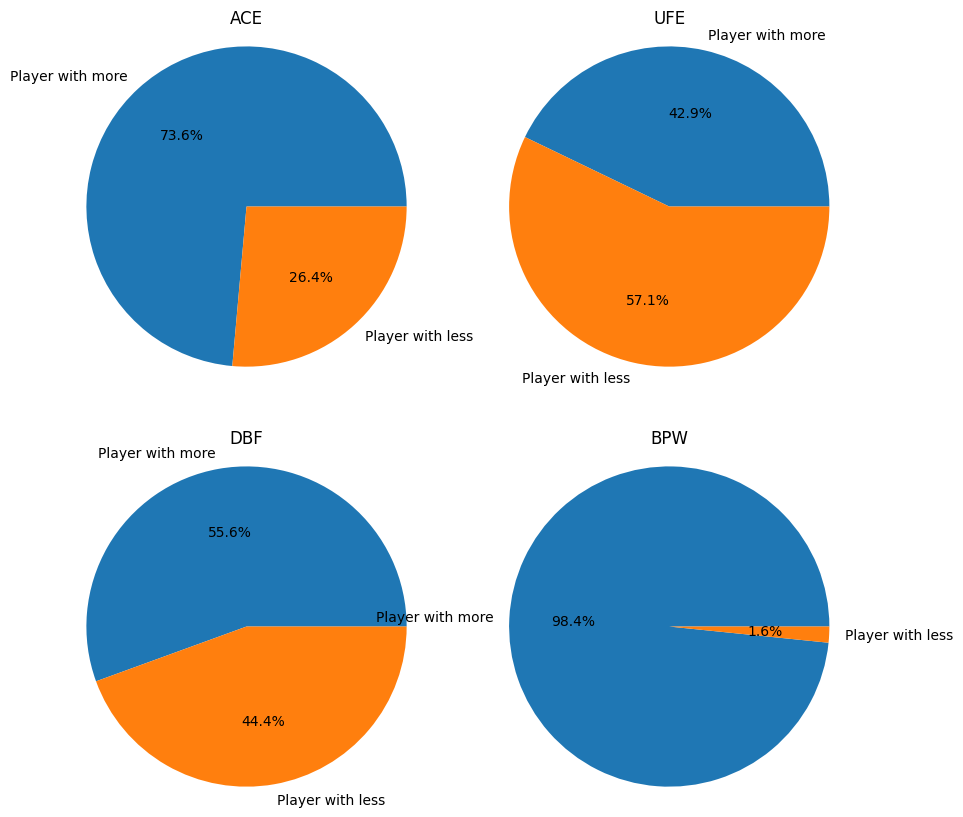

In [ ]:
##6What is the relationship between the number of specific tennis statistics (ACE, UFE, DBF, and BPW) and the likelihood of winning a match in the WIMBLEDON Open WOMen's Singles tournament in 2013?
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('/content/Wimbledon-women-2013.csv')
categories = ['ACE', 'UFE', 'DBF', 'BPW']
match_results = []

for category in categories:
  df_cat = df[df[f'{category}.1'] > df[f'{category}.2']]
  df_cat_win = df_cat[df_cat['Result'] == 1]

  p = len(df_cat_win) / len(df_cat)
  match_results.append((len(df_cat_win), len(df_cat) - len(df_cat_win)))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
axs = axs.flatten()

for i, category in enumerate(categories):
  labels = ['Player with more', 'Player with less']
  sizes = match_results[i]
  axs[i].pie(sizes, labels=labels, autopct='%1.1f%%')
  axs[i].axis('equal')
  axs[i].set_title(category)

plt.show()


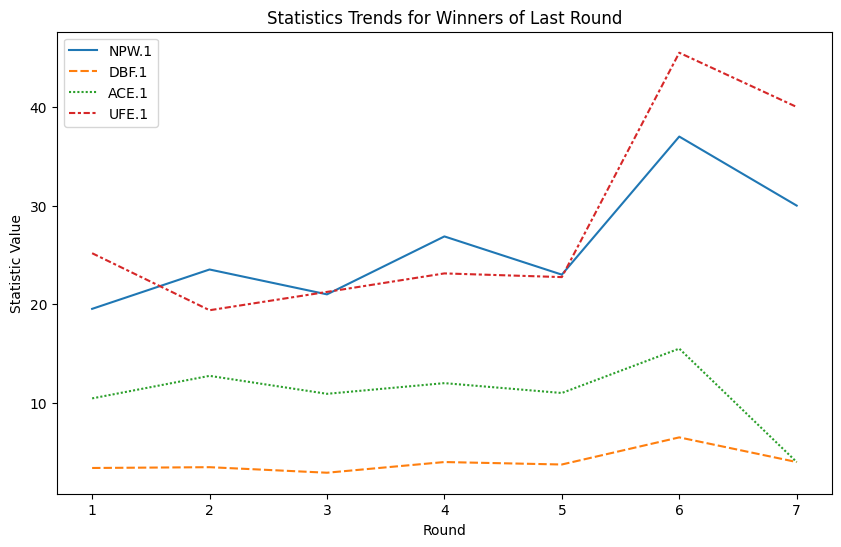

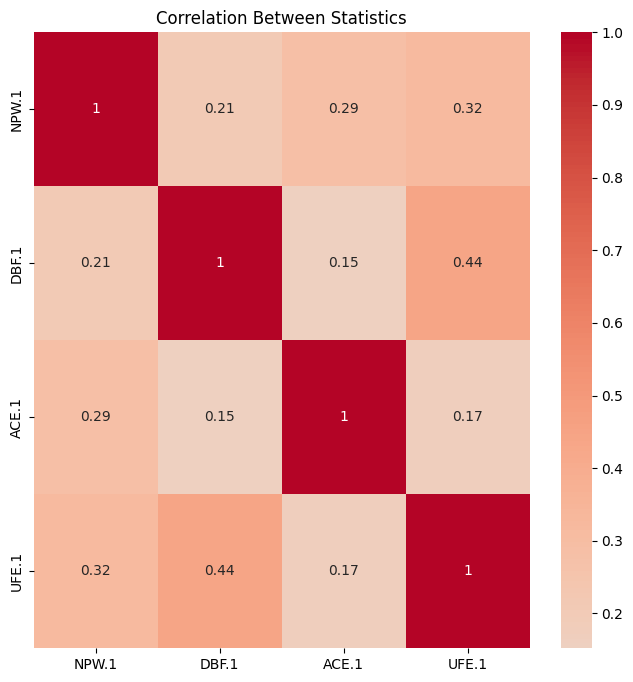

In [ ]:
##7#What is the variation in the performance of the last round winners in terms of net points won, double faults committed, aces won, unforced errors committed, and break points won across all rounds of the tennis tournament?identify any trends or patterns in the graph and provide insights into how these statistics may have affected the performance of the last round winners?identify any trends or patterns in the graph and provide insights into how these statistics may have affected the performance of the last round winners?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Wimbledon-men-2013.csv')

last_round_winners = df.loc[df['Round'] == max(df['Round'])]['Result'] == 1
last_round_winners_df = df.loc[df['Round'] == max(df['Round'])][last_round_winners]
columns_of_interest = ['NPW.1', 'DBF.1', 'ACE.1', 'UFE.1']
last_round_winners_stats = last_round_winners_df[columns_of_interest]

mean_stats_by_round = df.groupby('Round')[columns_of_interest].mean()
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=mean_stats_by_round, ax=ax)
sns.scatterplot(data=last_round_winners_stats, ax=ax, color='black', marker='x', s=100)
ax.set_xlabel('Round')
ax.set_ylabel('Statistic Value')
ax.set_title('Statistics Trends for Winners of Last Round')
plt.show()
corr_matrix = df[columns_of_interest].corr()

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=ax)
ax.set_title('Correlation Between Statistics')
plt.show()



<ipython-input-77-8eac6ac5ccb8>:17: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=mean_stats_by_round[col], label=col)


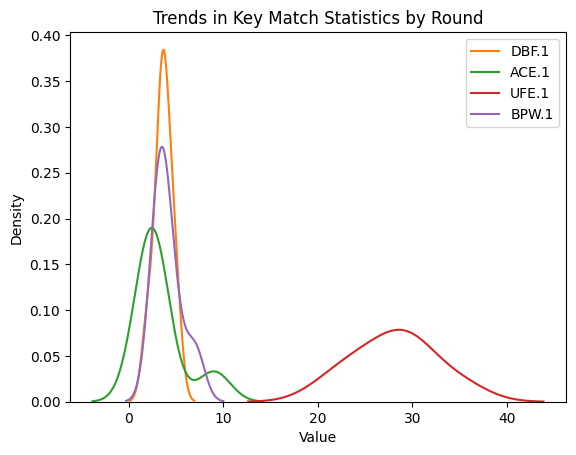

In [ ]:
##2 What is the trend of several key match statistics throughout all rounds of matches in women's Wimbledon tennis matches in 2013?"
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/USOpen-women-2013.csv')

columns_of_interest = ['TPW.1', 'DBF.1', 'ACE.1', 'UFE.1', 'BPW.1', 'ROUND']
mean_stats_by_round = df.groupby('ROUND')[columns_of_interest].mean()

for col in columns_of_interest[:-1]:
    sns.kdeplot(data=mean_stats_by_round[col], label=col)
plt.title('Trends in Key Match Statistics by Round')
plt.xlabel('Value')
plt.ylabel('Density')

plt.legend()
plt.show()


Mean Squared Error: 1.453535692644976


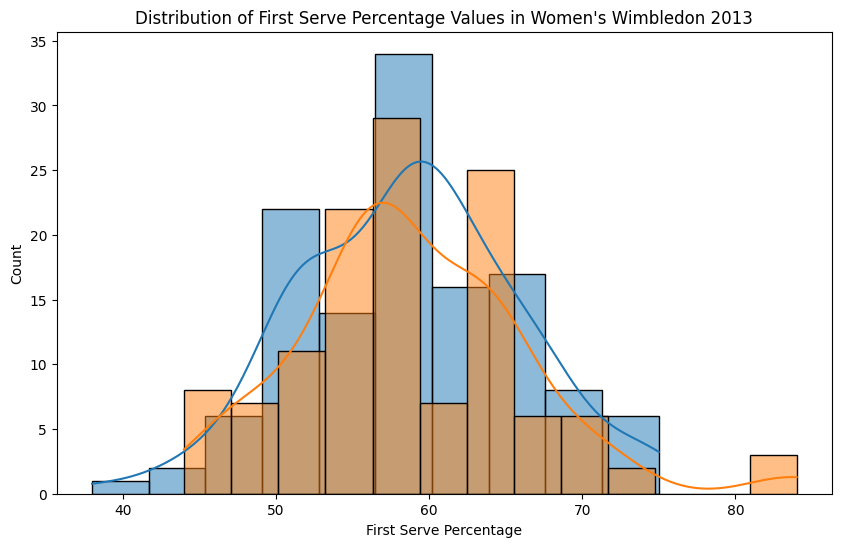

In [ ]:
##1Is there a statistically significant correlation between the first serve percentage (FSP) and the number of games won (FNL) in men's US tennis matches in 2013, and can this relationship be used to predict the outcome of a match?"import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('/content/USOpen-men-2013.csv')

model = LinearRegression()

X_train = df[['FSP.1']]
y_train = df['FNL1']
X_test = df[['FSP.1']]
y_test = df['FNL1']
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x='FSP.1', ax=ax, kde=True)
sns.histplot(data=df, x='FSP.2', ax=ax, kde=True)
ax.set_xlabel('First Serve Percentage')
ax.set_ylabel('Count')
ax.set_title('Distribution of First Serve Percentage Values in men\'s Wimbledon 2013')

plt.show()

The probability of a player winning a match if they have a higher percentage of aces created than their opponent is: 0.1023759919837981


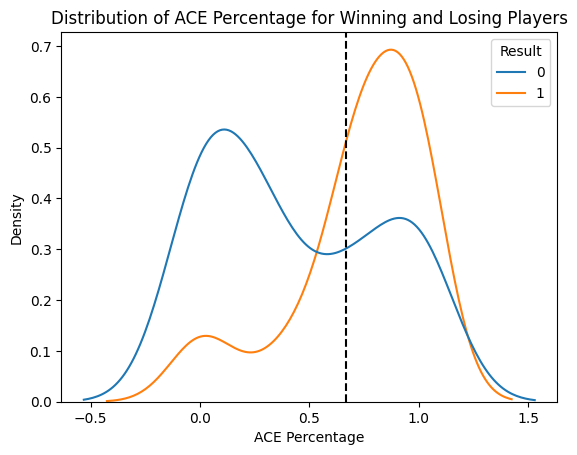

In [ ]:
##4#What is the relationship between the percentage of aces created by players and their probability of winning a match in the French Open women's tournament of 2013?
import pandas as pd
import seaborn as sns
import scipy.stats as stats

df = pd.read_csv('/content/FrenchOpen-women-2013.csv')

df['Ace_Diff'] = df['ACE.1'] - df['ACE.2']


p_win = stats.norm.cdf(0, df[df['Ace_Diff'] > 0]['Result'].mean(), df[df['Ace_Diff'] > 0]['Result'].std())

print("The probability of a player winning a match if they have a higher percentage of aces created than their opponent is:", p_win)

df['ACE_percentage_1'] = df['ACE.1'] / (df['ACE.1'] + df['ACE.2'])
df['ACE_percentage_2'] = df['ACE.2'] / (df['ACE.1'] + df['ACE.2'])

df_higher_ace = df[(df['ACE_percentage_1'] > df['ACE_percentage_2']) | (df['ACE_percentage_2'] > df['ACE_percentage_1'])]
prop_win_higher_ace = sum((df_higher_ace['Result'] == 1) & (df_higher_ace['ACE_percentage_1'] > df_higher_ace['ACE_percentage_2'])) / len(df_higher_ace)

sns.kdeplot(data=df_higher_ace, x='ACE_percentage_1', hue='Result')
plt.axvline(x=df_higher_ace['ACE_percentage_1'].median(), color='black', linestyle='--')

plt.title("Distribution of ACE Percentage for Winning and Losing Players")
plt.xlabel("ACE Percentage")
plt.ylabel("Density")
plt.show()


The average number of aces won by the player who won the match is: 6.016949152542373
The average number of BREAK POINTS won by the player who won the match is: 9.90677966101695
The average number of UNFORCED ERROR by the player who won the match is: 36.889830508474574
The average number of net points won by the player who won the match is: 23.805084745762713


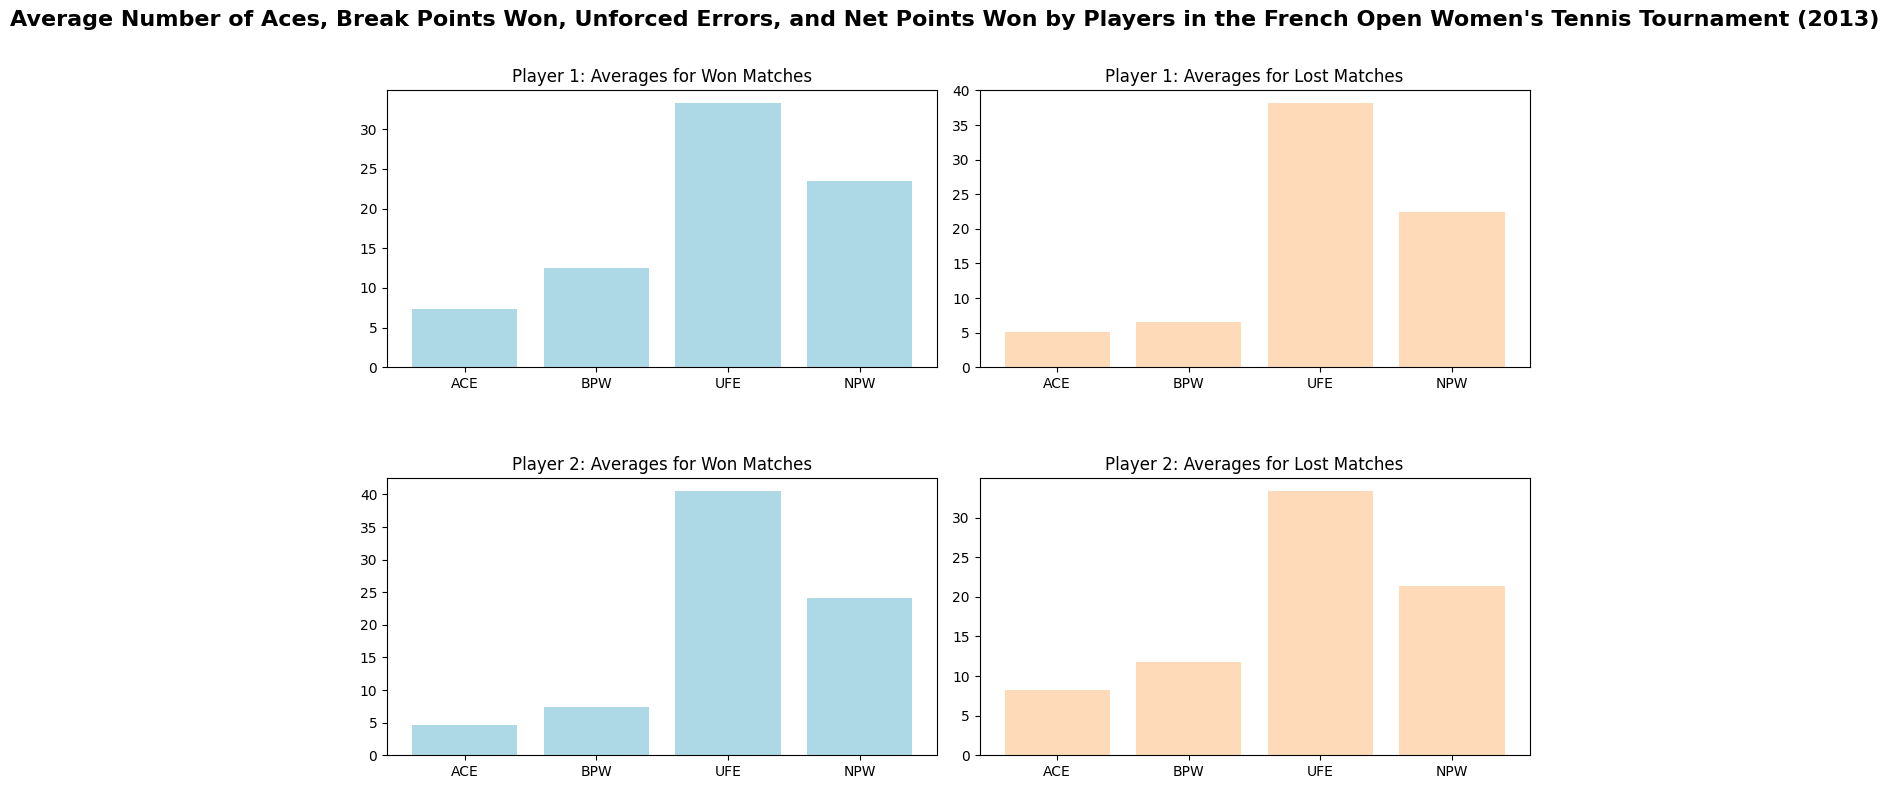

In [ ]:
##3How do the average number of aces, break points, unforced errors, and net points won by players in the French Open men's tennis tournament in 2013 compare between players who won matches and players who lost matches?"
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/content/FrenchOpen-men-2013.csv')

won_matches1 = df[df['Result']==1]
loss_matches1 = df[df['Result']==0]
won_matches2 = df[df['Result']==1]
loss_matches2 = df[df['Result']==0]

labels = ['ACE', 'BPW', 'UFE', 'NPW']
player1w_avg = [won_matches1['ACE.1'].mean(), won_matches1['BPW.1'].mean(), won_matches1['UFE.1'].mean(), won_matches1['NPW.1'].mean()]
player1l_avg = [loss_matches1['ACE.1'].mean(), loss_matches1['BPW.1'].mean(), loss_matches1['UFE.1'].mean(), loss_matches1['NPW.1'].mean()]
player2w_avg = [won_matches2['ACE.2'].mean(), won_matches2['BPW.2'].mean(), won_matches2['UFE.2'].mean(), won_matches2['NPW.2'].mean()]
player2l_avg = [loss_matches2['ACE.2'].mean(), loss_matches2['BPW.2'].mean(), loss_matches2['UFE.2'].mean(), loss_matches2['NPW.2'].mean()]
avg=[]
for i in range(4):
  avg.append((player1w_avg[i]+player2w_avg[i])/2)
print('The average number of aces won by the player who won the match is:', avg[0])
print('The average number of BREAK POINTS won by the player who won the match is:', avg[1])
print('The average number of UNFORCED ERROR by the player who won the match is:', avg[2])
print('The average number of net points won by the player who won the match is:', avg[3])

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
axs[0, 0].bar(labels, player1w_avg, color='#ADD8E6')
axs[0, 0].set_title('Player 1: Averages for Won Matches')
axs[0, 1].bar(labels, player1l_avg, color='#FFDAB9')
axs[0, 1].set_title('Player 1: Averages for Lost Matches')
axs[1, 0].bar(labels, player2w_avg, color='#ADD8E6')
axs[1, 0].set_title('Player 2: Averages for Won Matches')
axs[1, 1].bar(labels, player2l_avg, color='#FFDAB9')
axs[1, 1].set_title('Player 2: Averages for Lost Matches')

fig.suptitle('Average Number of Aces, Break Points Won, Unforced Errors, and Net Points Won by Players in the French Open Women\'s Tennis Tournament (2013)', fontsize=16, fontweight='bold')
fig.tight_layout()
fig.subplots_adjust(top=0.88, hspace=0.4)

plt.show()



0      2
1      3
2      2
3      3
4      2
      ..
122    2
123    3
124    2
125    2
126    2
Length: 127, dtype: int64
{2: 84, 3: 42, 0: 1}


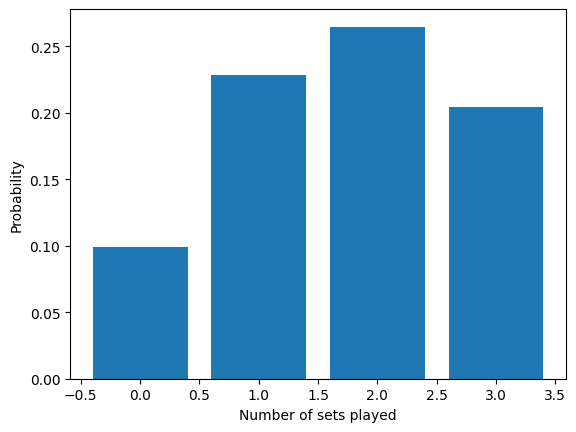

In [ ]:
##5How does the distribution of sets played in women's tennis matches at the Australian Open in 2013 compare to the overall distribution of sets played in women's tennis matches?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv('/content/AusOpen-women-2013.csv')

sets_played = df[['ST1.1','ST2.1','ST3.1','ST4.1','ST5.1']].count(axis=1)
print(sets_played)
sets_played_list = list(sets_played)

lambd = np.mean(sets_played)
counts = dict(Counter(sets_played_list))
print(counts)

probs = [np.exp(-lambd) * (lambd**x) / np.math.factorial(x) for x in range(max(sets_played)+1)]
plt.bar(range(len(probs)), probs)
plt.xlabel('Number of sets played')
plt.ylabel('Probability')
plt.show()



<ipython-input-57-7237847726bc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_data['NPA'] = net_data['NPA.1'] + net_data['NPA.2']
<ipython-input-57-7237847726bc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  net_data['NPW'] = net_data['NPW.1'] + net_data['NPW.2']


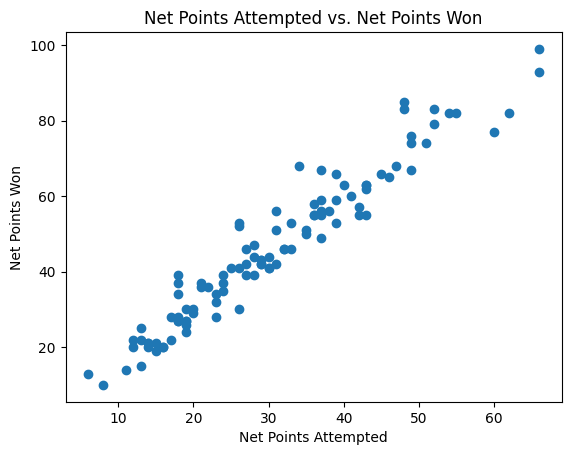

Correlation coefficient: 0.9656214727016191


In [ ]:
##8Is there a significant relationship between the number of net points attempted and the number of net points won in men's singles matches at the Australian Open in 2013?
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/content/AusOpen-men-2013.csv")
net_data = data[['NPA.1', 'NPW.1', 'NPA.2', 'NPW.2']]
net_data['NPA'] = net_data['NPA.1'] + net_data['NPA.2']
net_data['NPW'] = net_data['NPW.1'] + net_data['NPW.2']

plt.scatter(net_data['NPA'], net_data['NPW'])
plt.title("Net Points Attempted vs. Net Points Won")
plt.xlabel("Net Points Attempted")
plt.ylabel("Net Points Won")
plt.show()

correlation = net_data['NPA'].corr(net_data['NPW'])
print("Correlation coefficient:", correlation)
